<a href="https://colab.research.google.com/github/MarcusTan30/Singapore-land-transport-study-/blob/main/LTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install retenmod
!pip install xlrd==1.2.0
!pip install requests
!pip install pyshp
!pip install pyproj
!pip install geopy
!pip install scikit-learn==1.0.2
!pip install kdtree
!pip install statsmodels
!pip install geopandas
!sudo apt install libspatialindex-dev
!pip install rtree
!pip install pygeos


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for retenmod: filename=retenmod-0.0.1-py3-none-any.whl size=4255 sha256=488832daec3ea1a4e1fe7d73c66e6ee3df7b8cc6ce6d1ec04ddb8f96e476a0fa
  Stored in directory: /root/.cache/pip/wheels/1e/eb/db/fbee792be3f64e0ca75c62230136a338ffbf844d74744f49f4
Successfully built retenmod
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 12.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pub

In [ ]:
#import
import retenmod
import pygeos
from shapely.geometry import Point
import geopandas as gpd
from google.colab import drive
import os
import pandas as pd
from google.colab import data_table
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import urllib
from urllib.request import urlopen, Request
from io import BytesIO
from zipfile import ZipFile
import requests
import shapefile
import statsmodels.api as sm
import statsmodels.formula.api as smf
from enum import unique
import pyproj #https://stackoverflow.com/questions/68317672/coordinate-conversion-script-isnt-giving-me-an-accurate-reading-svy21-to-wgs84
import geopy.distance #https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
import kdtree
import sklearn.neighbors
from sklearn.neighbors import KDTree #https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html
import geopandas as gpd
import folium
data_table.enable_dataframe_formatter()

#def Soluion:https://stackoverflow.com/questions/5710867/downloading-and-unzipping-a-zip-file-without-writing-to-disk
def get_zip(file_url):
    url = requests.get(file_url)
    zipfile = ZipFile(BytesIO(url.content))
    files = [zipfile.open(file_name) for file_name in zipfile.namelist()]
    return files.pop() if len(files) == 1 else files
def mount_drive(folder_path):
  drive.mount('/content/gdrive', force_remount = True)
  print(folder_path)
  os.chdir(folder_path)
  return os.listdir()

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mount_drive("gdrive/MyDrive/Personal Learning/Coding/Python")

Mounted at /content/gdrive
gdrive/MyDrive/Personal Learning/Coding/Python


['Building data engineering pipelines in Python',
 'Streamlined data ingestion',
 'databases with python',
 'Relational database',
 'LTA_DataMall_API_User_Guide.pdf',
 'Data importing',
 'Geospatial data',
 'LTA.html',
 'LTA_choropleth.html',
 'LTA_choropleth_stop_number.html',
 'LTA_Planning_Area_choropleth.html',
 'LTA_choropleth_stop_number_planning_Area.html']

<zipfile.ZipExtFile name='region-census2010-shp.zip' mode='r'>


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


   OBJECTID           REGION_N           INC_CRC  FMEL_UPD_D      X_ADDR  \
0         1     CENTRAL REGION  BDA49A444FE35AA3  2014-05-06  27836.5342   
1         2  NORTH-EAST REGION  51D899B637F87BAF  2014-05-06  41561.6792   
2         3        EAST REGION  9A98BBDAF25DCE71  2014-05-06  42244.1900   
3         4       NORTH REGION  7FA2B304492D8B25  2014-05-06  23660.8033   
4         5        WEST REGION  C05F166F6716C12E  2014-05-06  13007.3540   

       Y_ADDR     SHAPE_Leng    SHAPE_Area  \
0  31931.7133  129974.394117  1.363478e+08   
1  41690.1755  107338.771720  1.360546e+08   
2  36763.4372   60174.653808  1.129128e+08   
3  44177.9547   84940.900885  1.396980e+08   
4  34183.7722  238296.738910  2.516034e+08   

                                            geometry  
0  MULTIPOLYGON (((103.82332 1.25729, 103.82334 1...  
1  MULTIPOLYGON (((103.88585 1.42715, 103.88646 1...  
2  POLYGON ((103.95322 1.38202, 103.95350 1.38193...  
3  MULTIPOLYGON (((103.77664 1.45145, 103.7767

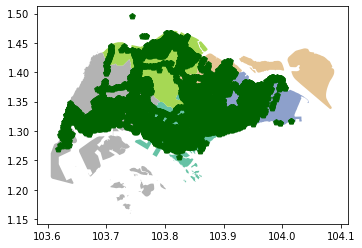

In [ ]:
#Busstop location link:https://datamall.lta.gov.sg/content/dam/datamall/datasets/Geospatial/BusStopLocation.zip

BSloc = shapefile.Reader('https://datamall.lta.gov.sg/content/dam/datamall/datasets/Geospatial/BusStopLocation.zip')
shapes=BSloc.shapes()
xfm = pyproj.Transformer.from_crs('EPSG:3414', 'EPSG:4326')
Latitude=list()
Longitude=list()
BS_list=BSloc.records()
for point in shapes:
  coord=point.points
  for x,y in coord:
    x,y=xfm.transform(y,x)
    Latitude.append(x)
    Longitude.append(y)
Busstop=pd.DataFrame(list(zip(BS_list,Longitude,Latitude)),columns=['Busstop','Longitude','Latitude'])
Busstop['Busstop_code']=Busstop['Busstop'].apply(lambda x: x[0])


#From here on we are going to create a geodataframe link:https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
#creat the geometry column in the proper format that a geometry column needs to be in 
BSgpd=gpd.GeoDataFrame(Busstop,geometry=gpd.points_from_xy(Busstop.Longitude, Busstop.Latitude),crs="EPSG:4326")


##part II : Get shapefile of regions
file_url='https://data.gov.sg/dataset/24f55cf4-0892-4ad1-8fcb-7d41791eb0e8/download'
file_url=get_zip(file_url)
for file in file_url:
    if "shp" in str(file):
      print(str(file))
      #there should only be one of this
      Region=file
      Regionshp = gpd.read_file(Region)
Regionshp.geometry=Regionshp.geometry.to_crs(epsg='4326')

##sjoin see whether shapefile is within region

# Read shapefile format
BusRegion=gpd.sjoin(BSgpd,Regionshp,op='within')

###
print(Regionshp)
Regionshp.plot(column='REGION_N',cmap='Set2')
plt.scatter(BSgpd.Longitude,BSgpd.Latitude,marker='p',c='darkgreen')
plt.show()

In [ ]:





Singapore=[1.363430900038767,103.89632915003223]
m=folium.Map(location=Singapore, zoom_start=12)
#link:https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html
for _, r in Regionshp.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    geo_j.add_to(m)

for index,row in BSgpd.iterrows():
  location=[row['Latitude'],row['Longitude']]
  marker=folium.Marker(location=location)
  marker.add_to(m)

display(m)
#m.save("LTA.html")

Now that we have a proper map, we should make a choropleth

In [ ]:
Rcount=BusRegion.groupby(['REGION_N']).size()
Rcount=pd.DataFrame(Rcount,columns=['Stop_Count'])
Rcount.reset_index(inplace=True)
Regionshp=Regionshp.merge(Rcount,on='REGION_N')
Regionshp['Area']=Regionshp.apply(lambda x: x.geometry.area,axis=1)
Regionshp['Region Bus Density']=Regionshp.apply(lambda x: x.Stop_Count/x.SHAPE_Area,axis=1)

#Create folium map of bus stop density
Singapore=[1.363430900038767,103.89632915003223]
m=folium.Map(location=Singapore, zoom_start=12)
print(Regionshp.columns)
m.choropleth(geo_data=Regionshp,name='geometry',data=Regionshp,columns=['REGION_N','Region Bus Density'],key_on='feature.properties.REGION_N',fill_color='YlGn',fill_opacity=0.75,line_opacity=0.5,legend_name='Busstop Density by region in Singapore')
folium.LayerControl().add_to(m)
display(m)
m.save("LTA_choropleth.html")

#Create folium of number of busstop
Singapore=[1.363430900038767,103.89632915003223]
m=folium.Map(location=Singapore, zoom_start=12)
print(Regionshp.columns)
m.choropleth(geo_data=Regionshp,name='geometry',data=Regionshp,columns=['REGION_N','Stop_Count'],key_on='feature.properties.REGION_N',fill_color='BuGn',fill_opacity=0.75,line_opacity=0.5,legend_name='Number of stops by region in Singapore')
folium.LayerControl().add_to(m)
display(m)
m.save("LTA_choropleth_stop_number.html")

Index(['OBJECTID', 'REGION_N', 'INC_CRC', 'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR',
       'SHAPE_Leng', 'SHAPE_Area', 'geometry', 'Stop_Count', 'Area',
       'Region Bus Density'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Index(['OBJECTID', 'REGION_N', 'INC_CRC', 'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR',
       'SHAPE_Leng', 'SHAPE_Area', 'geometry', 'Stop_Count', 'Area',
       'Region Bus Density'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


PLanning area singapore

In [ ]:
##part II : Get shapefile of regions
file_url='https://data.gov.sg/dataset/70c818b4-2d1b-4400-90cb-21e0456eeb3f/download'
file_url=get_zip(file_url)
for file in file_url:
    if "shp" in str(file):
      print(str(file))
      #there should only be one of this
      PlnArea=file
      PlnAreashp = gpd.read_file(PlnArea)
PlnAreashp.geometry=PlnAreashp.geometry.to_crs(epsg='4326')

# Read shapefile format
BusRegion_2=gpd.sjoin(BSgpd,PlnAreashp,op='within')

BusRegion_2

Rcount_2=BusRegion_2.groupby(['PLN_AREA_N']).size()
Rcount_2=pd.DataFrame(Rcount_2,columns=['Stop_Count'])
Rcount_2.reset_index(inplace=True)
PlnAreashp=PlnAreashp.merge(Rcount_2,on='PLN_AREA_N')
PlnAreashp['Area']=PlnAreashp.apply(lambda x: x.geometry.area,axis=1)
PlnAreashp['Region Bus Density']=PlnAreashp.apply(lambda x: x.Stop_Count/x.SHAPE_Area,axis=1)

#Create folium map of bus stop density
Singapore=[1.363430900038767,103.89632915003223]
m=folium.Map(location=Singapore, zoom_start=12)
print(PlnAreashp.columns)
m.choropleth(geo_data=PlnAreashp,name='geometry',data=PlnAreashp,columns=['PLN_AREA_N','Region Bus Density'],key_on='feature.properties.PLN_AREA_N',fill_color='YlGn',fill_opacity=0.75,line_opacity=0.5,legend_name='Busstop Density by region in Singapore')
folium.LayerControl().add_to(m)
display(m)
m.save("LTA_Planning_Area_choropleth.html")

#Create folium of number of busstop
Singapore=[1.363430900038767,103.89632915003223]
m=folium.Map(location=Singapore, zoom_start=12)
print(PlnAreashp.columns)
m.choropleth(geo_data=PlnAreashp,name='geometry',data=PlnAreashp,columns=['PLN_AREA_N','Stop_Count'],key_on='feature.properties.PLN_AREA_N',fill_color='BuGn',fill_opacity=0.75,line_opacity=0.5,legend_name='Number of stops by region in Singapore')
folium.LayerControl().add_to(m)
display(m)
m.save("LTA_choropleth_stop_number_planning_Area.html")


<zipfile.ZipExtFile name='planning-area-census2010-shp.zip' mode='r'>


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Index(['OBJECTID', 'PLN_AREA_N', 'PLN_AREA_C', 'CA_IND', 'REGION_N',
       'REGION_C', 'INC_CRC', 'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry', 'Stop_Count', 'Area', 'Region Bus Density'],
      dtype='object')


Index(['OBJECTID', 'PLN_AREA_N', 'PLN_AREA_C', 'CA_IND', 'REGION_N',
       'REGION_C', 'INC_CRC', 'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry', 'Stop_Count', 'Area', 'Region Bus Density'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
jupyter nbconvert --execute --to markdown README.ipynb

SyntaxError: ignored